# Predicting Gallstone Disease with Classifier 

## About Dataset

The clinical dataset was collected from the Internal Medicine Outpatient Clinic of Ankara VM Medical Park Hospital and includes data from 319 individuals (June 2022–June 2023), 161 of whom were diagnosed with gallstone disease. It contains 38 features, including demographic, bioimpedance, and laboratory data, and was ethically approved by the Ankara City Hospital Ethics Committee (E2-23-4632). Demographic variables are age, sex, height, weight, and BMI. Bioimpedance data includes total, extracellular, and intracellular water, muscle and fat mass, protein, visceral fat area, and hepatic fat. Laboratory features are glucose, total cholesterol, HDL, LDL, triglycerides, AST, ALT, ALP, creatinine, GFR, CRP, hemoglobin, and vitamin D. The dataset is complete, with no missing values, and balanced in terms of disease status, eliminating the need for additional preprocessing. It provides a strong foundation for machine learning-based gallstone prediction using non-imaging features.

You can access the dataset [here.](https://archive.ics.uci.edu/dataset/1150/gallstone-1)

## Content

| Variable Name                                  | Role    | Type        | Description                                       |
| ---------------------------------------------- | ------- | ----------- | ------------------------------------------------- |
| Gallstone Status                               | Target  | Binary      | Target variable Gallstones (present(1) absent(0)) |
| Age                                            | Feature | Integer     | Age of the person                                 |
| Gender                                         | Feature | Categorical | Gender of the person                              |
| Comorbidity                                    | Feature | Categorical | Concomitant diseases                              |
| Coronary Artery Disease (CAD)                  | Feature | Binary      | Cardiovascular disease                            |
| Hypothyroidism                                 | Feature | Binary      | Underactive thyroid gland                         |
| Hyperlipidemia                                 | Feature | Binary      | High levels of fat in the blood                   |
| Diabetes Mellitus (DM)                         | Feature | Binary      | High blood sugar                                  |
| Height                                         | Feature | Integer     | Height is the length                              |
| Weight                                         | Feature | Continuous  | Body weight                                       |
| Body Mass Index (BMI)                          | Feature | Continuous  | Weight for height ratio                           |
| Total Body Water (TBW)                         | Feature | Continuous  | Total water in the body                           |
| Extracellular Water (ECW)                      | Feature | Continuous  | Extracellular water                               |
| Intracellular Water (ICW)                      | Feature | Continuous  | Intracellular water                               |
| Extracellular Fluid/Total Body Water (ECF/TBW) | Feature | Continuous  | Extracellular water content                       |
| Total Body Fat Ratio (TBFR)                    | Feature | Continuous  | Total fat content                                 |
| Lean Mass (LM)                                 | Feature | Continuous  | Lean body mass                                    |
| Body Protein Content (Protein)                 | Feature | Continuous  | Essential building blocks for the body            |
| Visceral Fat Rating (VFR)                      | Feature | Integer     | Visceral organ fat level                          |
| Bone Mass (BM)                                 | Feature | Continuous  | Bone weight                                       |
| Muscle Mass (MM)                               | Feature | Continuous  | Amount of muscle                                  |
| Obesity                                        | Feature | Continuous  | Excessive adiposity                               |
| Total Fat Content (TFC)                        | Feature | Continuous  | Total fat amount                                  |
| Visceral Fat Area (VFA)                        | Feature | Continuous  | Inner adipose tissue area                         |
| Visceral Muscle Area (VMA)                     | Feature | Continuous  | Inner muscle area                                 |
| Hepatic Fat Accumulation (HFA)                 | Feature | Categorical | Accumulation of fat in the liver                  |
| Glucose                                        | Feature | Continuous  | Blood sugar                                       |
| Total Cholesterol (TC)                         | Feature | Continuous  | Total cholesterol                                 |
| Low Density Lipoprotein (LDL)                  | Feature | Continuous  | Bad cholesterol                                   |
| High Density Lipoprotein (HDL)                 | Feature | Continuous  | Good cholesterol                                  |
| Triglyceride                                   | Feature | Continuous  | Type of fat found in the blood                    |
| Aspartate Aminotransferase (AST)               | Feature | Continuous  | Type of liver enzyme                              |
| Alanine Aminotransferase (ALT)                 | Feature | Continuous  | An enzyme related to the liver                    |
| Alkaline Phosphatase (ALP)                     | Feature | Continuous  | Type of liver and bone enzyme                     |
| Creatinine                                     | Feature | Continuous  | Kidney function indicator                         |
| Glomerular Filtration Rate (GFR)               | Feature | Continuous  | Kidney filtration rate                            |
| C-Reactive Protein (CRP)                       | Feature | Continuous  | Inflammation indicator                            |
| Hemoglobin (HGB)                               | Feature | Continuous  | Protein in the blood that carries oxygen          |
| Vitamin D                                      | Feature | Continuous  | Essential vitamin for bone health                 |


### Additional Variable Information
Class Labels

- Gallstone Status: 0 (No), 1 (Yes)
- Gender: 0 (Male), 1 (Female)
- Comorbidity: 0 (No comorbidities present),1 (One comorbid condition), 2 (Two comorbid conditions), 3 (Three or more comorbid conditions)
- Coronary Artery Disease: 0 (No), 1 (Yes) 
- Hypothyroidism: 0 (No), 1 (Yes)
- Hyperlipidemia: 0 (No), 1 (Yes)
- Diabetes Mellitus: 0 (No), 1 (Yes)
- Hepatic Fat Accumulation (HFA): 0 (No fat accumulation),1 (Grade 1 (mild)), 2 (Grade 2 (moderate)), 3 (Grade 3 (severe)), 4 (Grade 4 (very severe))

## Objective

To build and evaluate classification models to predict Gallstone statud based on demographic, bioimpedence, and laboratory features such as Age, Diabetes, Thyriodism, Total Cholesterol to name a few.

### Importing librabries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score

import joblib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("gallstone.csv")
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


## Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [4]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


**Outliers:**

Since most of this dataset has continous values, we will check outliers for them while keeping the binary and categorical values untouched.

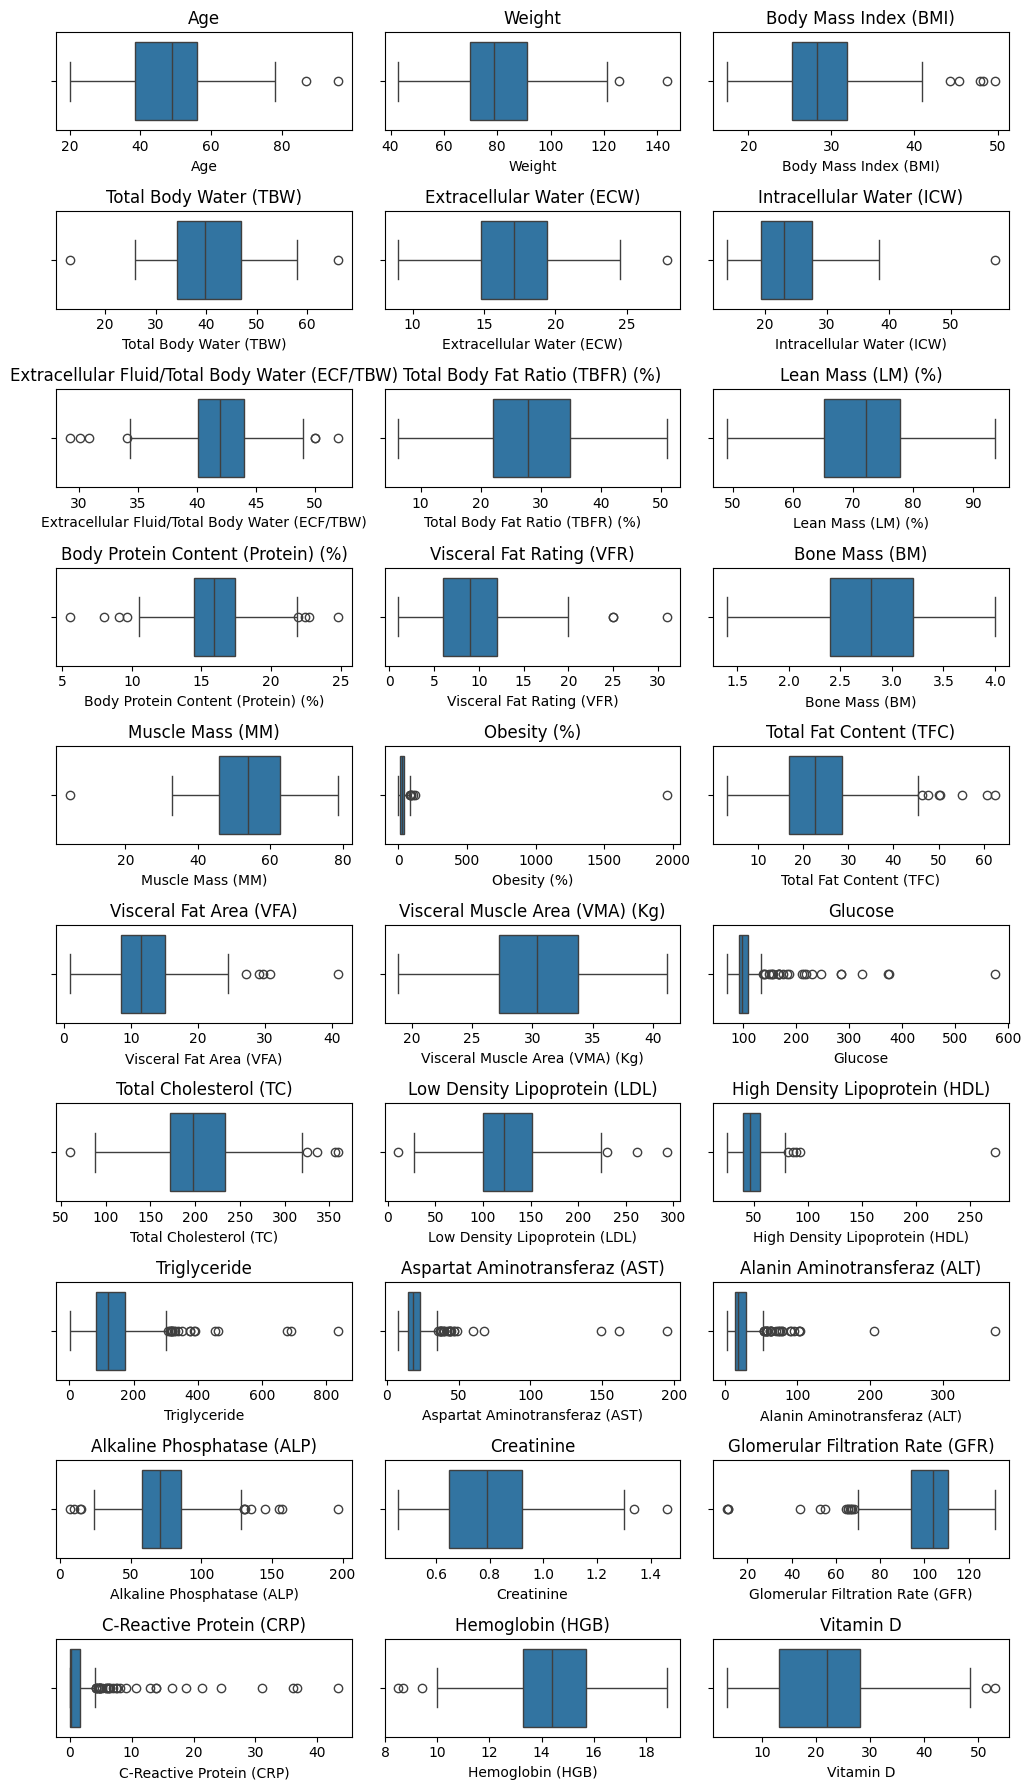

In [5]:
co_l = ['Gallstone Status','Gender','Comorbidity','Coronary Artery Disease (CAD)','Hypothyroidism','Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Hepatic Fat Accumulation (HFA)', 'Height']
dfc = df.drop(co_l, axis=1).columns

fig, axes = plt.subplots(10,3, figsize=(10,18))
axes = axes.flatten()

for i, column in enumerate(dfc):
    if i < len(axes):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'{column}')
    else:
        break

plt.tight_layout()
plt.show()

**Correlation:**

In [6]:
df.corr()['Gallstone Status'].drop('Gallstone Status').sort_values(ascending=False)

C-Reactive Protein (CRP)                          0.281995
Total Body Fat Ratio (TBFR) (%)                   0.225470
Total Fat Content (TFC)                           0.170158
Hyperlipidemia                                    0.161901
High Density Lipoprotein (HDL)                    0.158622
Gender                                            0.153483
Visceral Fat Area (VFA)                           0.140397
Body Mass Index (BMI)                             0.121507
Alkaline Phosphatase (ALP)                        0.109882
Diabetes Mellitus (DM)                            0.104689
Hepatic Fat Accumulation (HFA)                    0.090268
Obesity (%)                                       0.053920
Weight                                            0.048669
Age                                               0.036339
Visceral Fat Rating (VFR)                         0.018288
Total Cholesterol (TC)                            0.014100
Glucose                                          -0.0114

C-Reactive Protein has the highest positive correalation with Gallstone Status and 
Vitamin D has the highest negative correlation with Gallstone Status

Since we have so many variables, a heatmap correlation chart would be too messy to read.

So let us do with top 5 positive and negative correlation variables.

Text(0.5, 1.0, 'Correlation Heatmap')

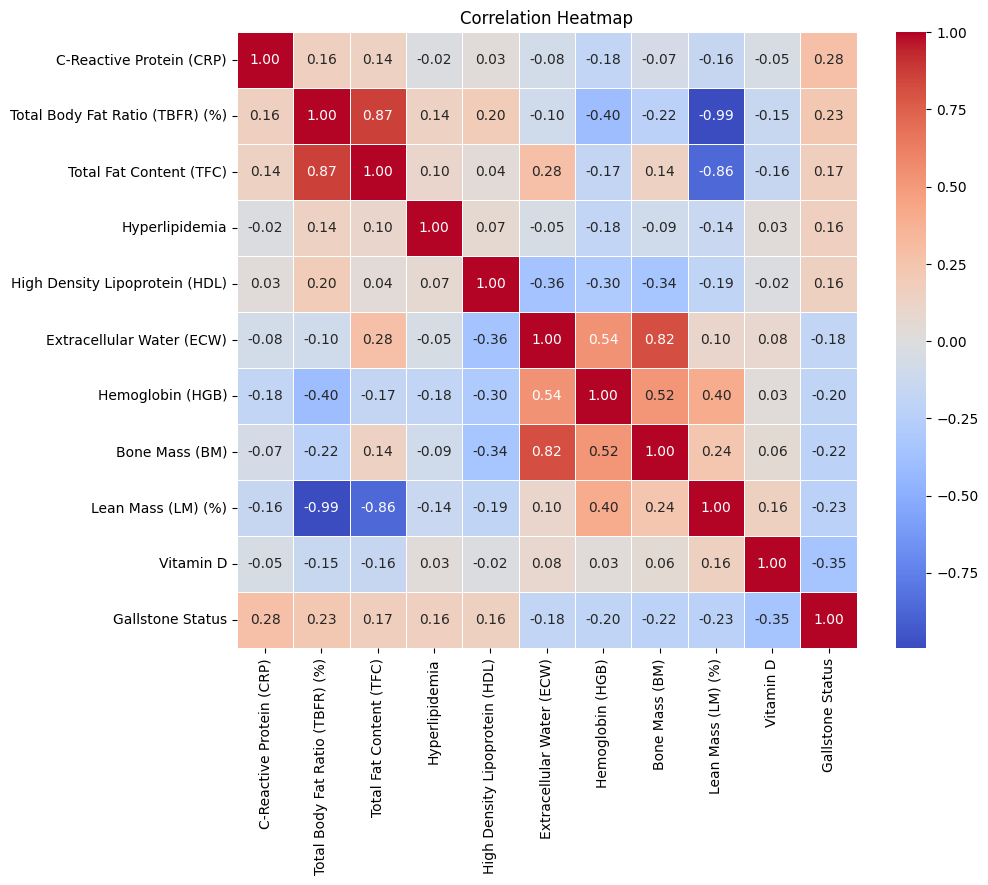

In [7]:
cor_mat = df[['C-Reactive Protein (CRP)','Total Body Fat Ratio (TBFR) (%)', 'Total Fat Content (TFC)', 'Hyperlipidemia', 'High Density Lipoprotein (HDL)', 'Extracellular Water (ECW)', 'Hemoglobin (HGB)', 'Bone Mass (BM)', 'Lean Mass (LM) (%)', 'Vitamin D', 'Gallstone Status']].corr()

plt.figure(figsize=(10,8))
hmap= sns.heatmap(cor_mat, annot=True, cmap='coolwarm', annot_kws={'size':10}, fmt='.2f', linewidths=0.5)
hmap.set_title("Correlation Heatmap")

<Axes: xlabel='Gallstone Status', ylabel='C-Reactive Protein (CRP)'>

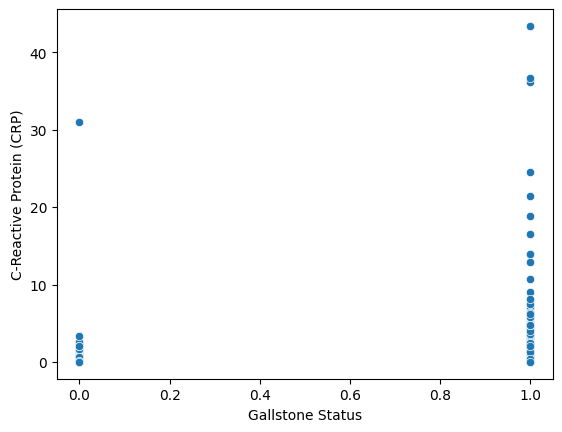

In [8]:
sns.scatterplot(x='Gallstone Status', y='C-Reactive Protein (CRP)', data=df)

**Distribution of Target Variable:**

<Axes: xlabel='Gallstone Status', ylabel='Count'>

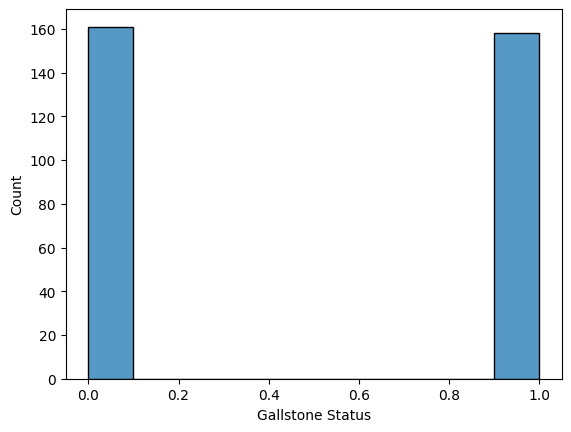

In [9]:
sns.histplot(x='Gallstone Status', data=df)

The target variable is balanced, which indicates that the dataset is balanced.

So we don't have to balance the data, although we will stratify the target inorder to preserve the balance.

### Data Preprocessing

In [10]:
df.count()

Gallstone Status                                  319
Age                                               319
Gender                                            319
Comorbidity                                       319
Coronary Artery Disease (CAD)                     319
Hypothyroidism                                    319
Hyperlipidemia                                    319
Diabetes Mellitus (DM)                            319
Height                                            319
Weight                                            319
Body Mass Index (BMI)                             319
Total Body Water (TBW)                            319
Extracellular Water (ECW)                         319
Intracellular Water (ICW)                         319
Extracellular Fluid/Total Body Water (ECF/TBW)    319
Total Body Fat Ratio (TBFR) (%)                   319
Lean Mass (LM) (%)                                319
Body Protein Content (Protein) (%)                319
Visceral Fat Rating (VFR)   

**There is no missing data in this dataset.**

In [11]:
X = df.drop('Gallstone Status', axis=1)
X_columns = list(X.columns)
X.head()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,50,0,0,0,0,0,0,185,92.8,27.1,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,47,0,1,0,0,0,0,176,94.5,30.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,61,0,0,0,0,0,0,171,91.1,31.2,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,41,0,0,0,0,0,0,168,67.7,24.0,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,42,0,0,0,0,0,0,178,89.6,28.3,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [12]:
Y = df['Gallstone Status']
print(Y.head())
print(Y.value_counts())

0    0
1    0
2    0
3    0
4    0
Name: Gallstone Status, dtype: int64
Gallstone Status
0    161
1    158
Name: count, dtype: int64


### Splitting and Scaling our data:

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

Since our binary and categorical values are already in useable condition, we don't have to use Encoders.

But, we have to scale our continous variables.

In [14]:
cat_features = ['Gender','Comorbidity','Coronary Artery Disease (CAD)','Hypothyroidism','Hyperlipidemia','Diabetes Mellitus (DM)','Hepatic Fat Accumulation (HFA)']

This is our categorical features list.

In [15]:
num_features = X_train.drop(cat_features, axis=1).columns.tolist()

Now we got both our lists.

In [16]:
ss = StandardScaler()

X_train[num_features] = ss.fit_transform(X_train[num_features])
X_test[num_features] = ss.fit_transform(X_test[num_features])

### Functions:

Let us create some functions, which will save us some time and reduce redundancy.

In [17]:
def disp_mat(y_test, y_pred, model):
    '''
    Calculates and plots the Confusion Matrix for classification results.
    '''
    conf_mat=confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

In [18]:
model_m = []
acc_m = []
roc_m = []
f1_m = []
prec_m = []

def scores(y_test, y_pred, model):
    '''
    Calculates and prints the metrics of model's prediction. 
    '''
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    print("Model: ", model)
    print(classification_report(y_test, y_pred))
    print("Accuracy score: ", acc)
    print("Roc Auc score: ", roc)    
    model_m.append(model)
    acc_m.append(acc)
    roc_m.append(roc)
    f1_m.append(f1_score(y_test, y_pred))
    prec_m.append(precision_score(y_test, y_pred))

In [19]:
def model_eval(model):
    '''
    Prints the model's best parameters and score.
    '''
    print("Best Parameters: ", model.best_params_)
    print("Best Score: ", model.best_score_)

## One Vs One Classifier:

In [20]:
ovo = OneVsOneClassifier(LogisticRegression())
ovo.fit(X_train, Y_train)

ovo_pred = ovo.predict(X_test)
scores(Y_test, ovo_pred, 'OnevsOne Classifier')

Model:  OnevsOne Classifier
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.82      0.72      0.77        32

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.79      0.78      0.78        64

Accuracy score:  0.78125
Roc Auc score:  0.78125


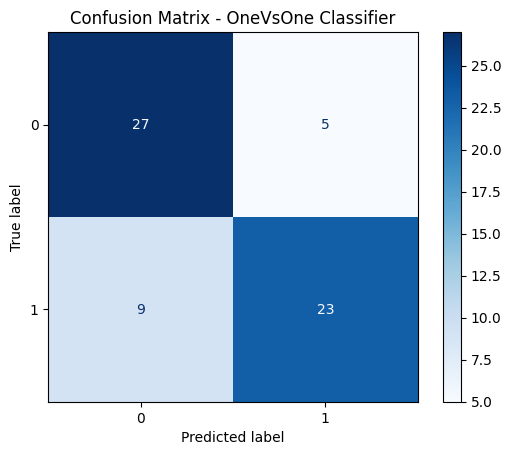

In [21]:
disp_mat(Y_test, ovo_pred, 'OneVsOne Classifier')

## Support Vector Machine:

In [22]:
svc= SVC()
params = {'kernel' :['linear', 'poly', 'rbf'],
          'C':[1,10,100,1000],
        'gamma':[0.01,0.1,1,10,100]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(svc, param_grid=params, cv=cv, n_jobs=5, scoring='accuracy', verbose=False)
grid.fit(X_train, Y_train)
model_eval(grid)

Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best Score:  0.7686274509803921


In [23]:
svc = SVC(kernel='linear', C=10, gamma=0.1)
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
scores(Y_test, svc_pred, 'SVC')

Model:  SVC
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.76      0.81      0.79        32

    accuracy                           0.78        64
   macro avg       0.78      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64

Accuracy score:  0.78125
Roc Auc score:  0.78125


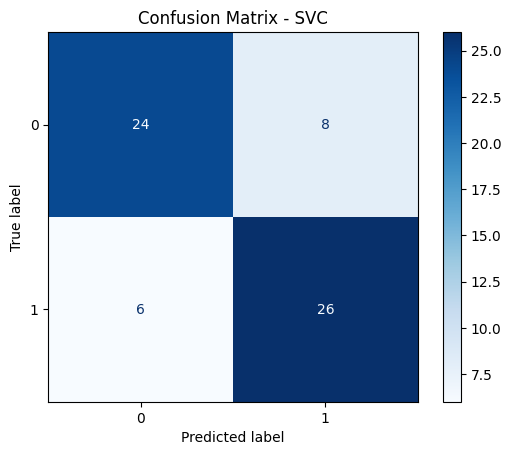

In [24]:
disp_mat(Y_test, svc_pred, 'SVC')

## K Neighbors Classifier:

In [25]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors':[3,4,5]}
grid_knn = GridSearchCV(knn, param_grid=param_knn, cv=cv, n_jobs=5, scoring='accuracy')
grid_knn.fit(X_train, Y_train)
model_eval(grid_knn)

Best Parameters:  {'n_neighbors': 5}
Best Score:  0.592156862745098


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
scores(Y_test, knn_pred, "KNeighbors Classifier")

Model:  KNeighbors Classifier
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        32
           1       0.76      0.59      0.67        32

    accuracy                           0.70        64
   macro avg       0.71      0.70      0.70        64
weighted avg       0.71      0.70      0.70        64

Accuracy score:  0.703125
Roc Auc score:  0.703125


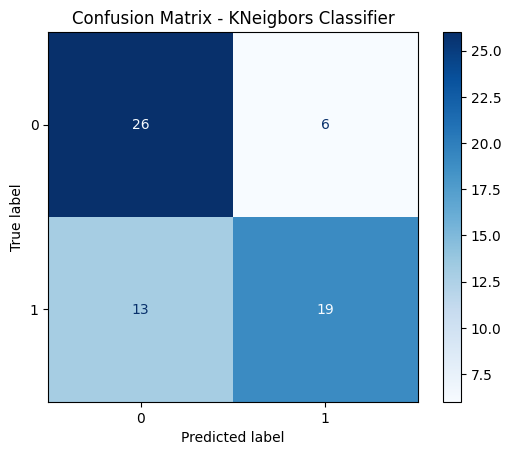

In [27]:
disp_mat(Y_test, knn_pred, 'KNeigbors Classifier')

## Random Forest Classifier:

In [28]:
rf = RandomForestClassifier(random_state=42)
param_rf = {'n_estimators':[50,100],
           'max_depth':[3, 5],
           'min_samples_split':[2,3]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(rf, param_grid = param_rf, cv=cv, scoring='accuracy')
grid.fit(X_train, Y_train)
model_eval(grid)

Best Parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.7647058823529411


In [29]:
rf = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=100,random_state=42)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
scores(Y_test, rf_pred, 'Random Forest Classifier')

Model:  Random Forest Classifier
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.83      0.78      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64

Accuracy score:  0.8125
Roc Auc score:  0.8125


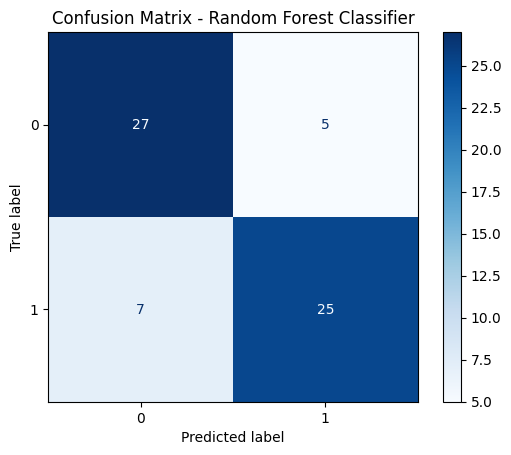

In [30]:
disp_mat(Y_test, rf_pred, 'Random Forest Classifier')

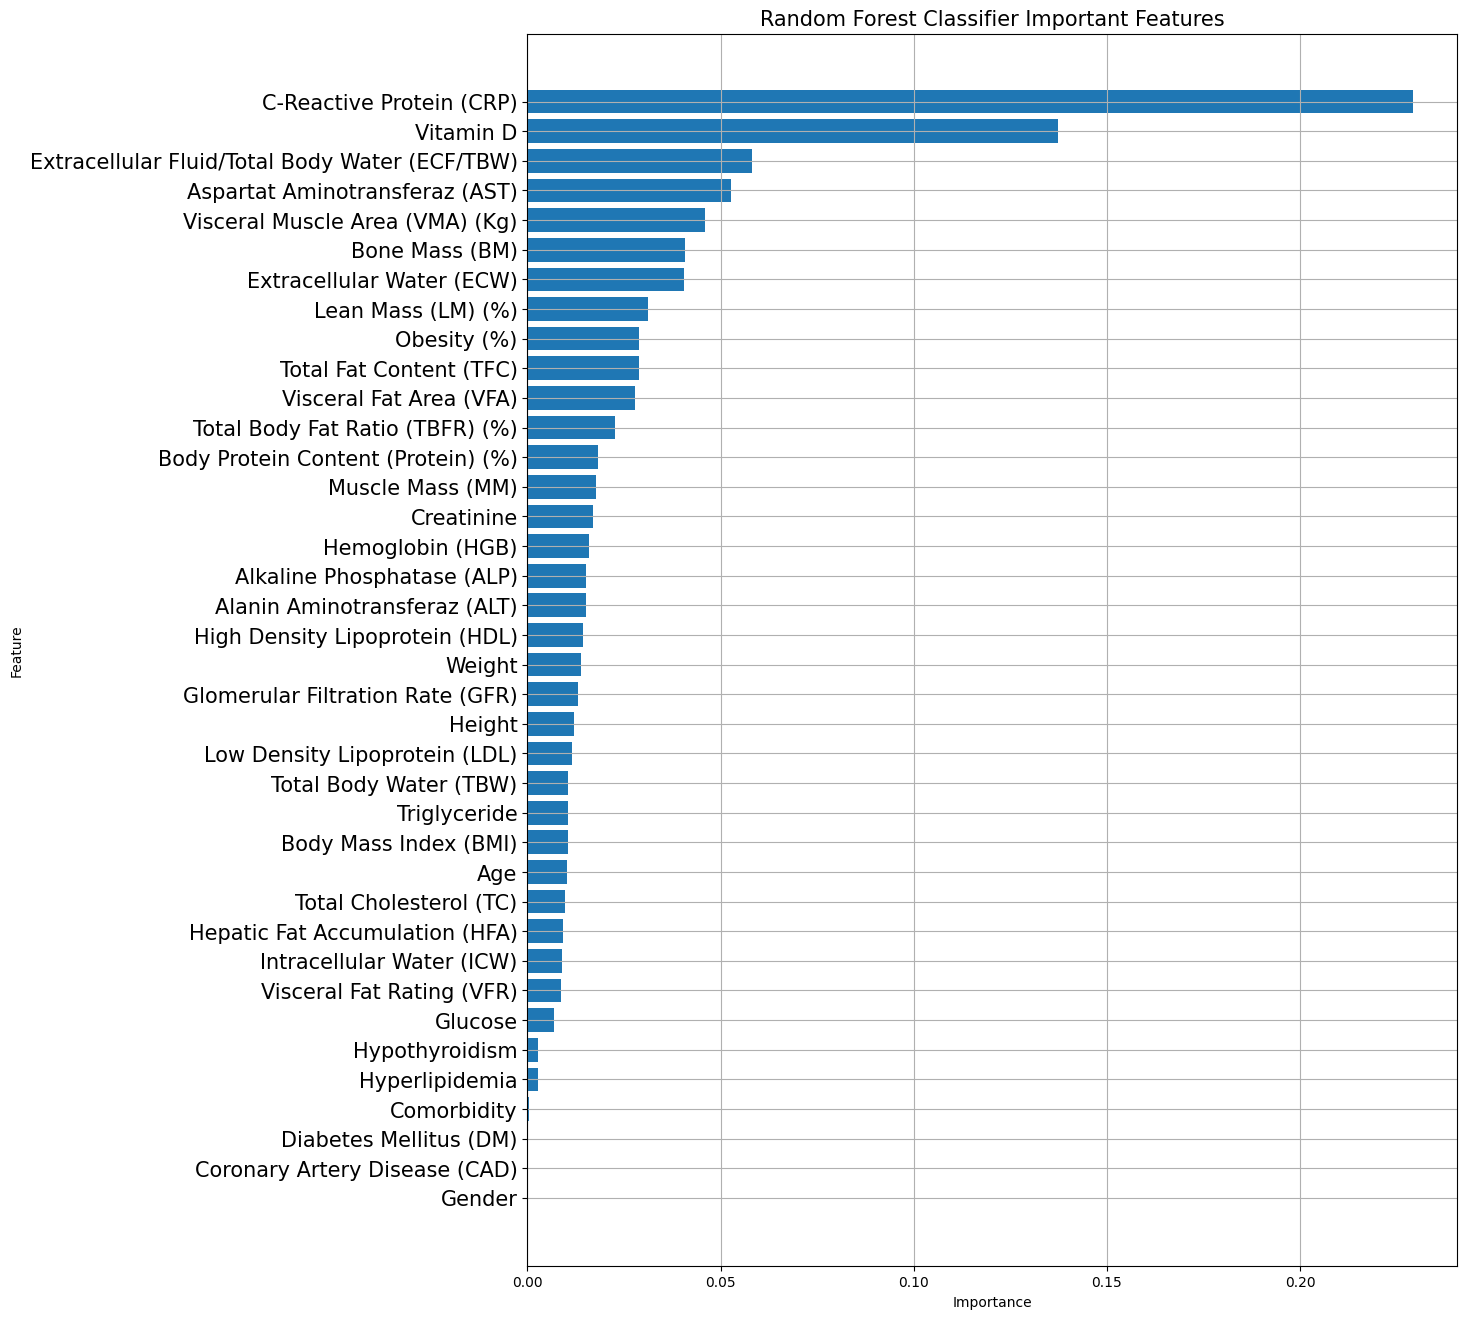

In [31]:
imp_features = rf.feature_importances_

f_names = X_columns
sorted_imp = imp_features.argsort()[::-1]

plt.figure(figsize=(12,16))
plt.grid(True)
bars = plt.barh(range(len(imp_features)), imp_features[sorted_imp][::-1])
plt.yticks( range(len(imp_features)), [f_names[i] for i in sorted_imp][::-1], fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier Important Features', fontsize=15)
plt.show()

C-Reactive Protein has the highest importance in the features list.

With Vitamin and Extracellular Fluid/ Total Body water comes in as respective second and third important features.

## Ada Boost Classifier:

In [32]:
base = DecisionTreeClassifier(max_depth=3)
ada = AdaBoostClassifier(estimator=base, random_state=42)
param_ada = {'n_estimators':[50, 100, 200],
            'learning_rate':[0.1,1,10]}
grid = GridSearchCV(ada, param_grid = param_ada, cv=cv, scoring='accuracy')
grid.fit(X_train, Y_train)
model_eval(grid)

Best Parameters:  {'learning_rate': 1, 'n_estimators': 100}
Best Score:  0.7843137254901962


In [33]:
ada = AdaBoostClassifier(estimator=base, learning_rate=1, n_estimators=100,random_state=42)
ada.fit(X_train, Y_train)
ada_pred = ada.predict(X_test)
scores(Y_test, ada_pred, 'AdaBoost Classifier')

Model:  AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.86      0.78      0.82        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64

Accuracy score:  0.828125
Roc Auc score:  0.828125


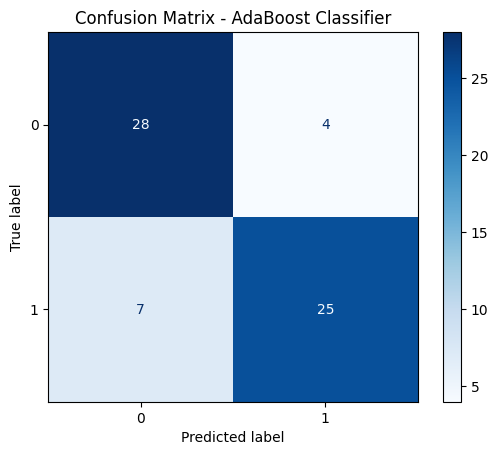

In [34]:
disp_mat(Y_test, ada_pred, 'AdaBoost Classifier')

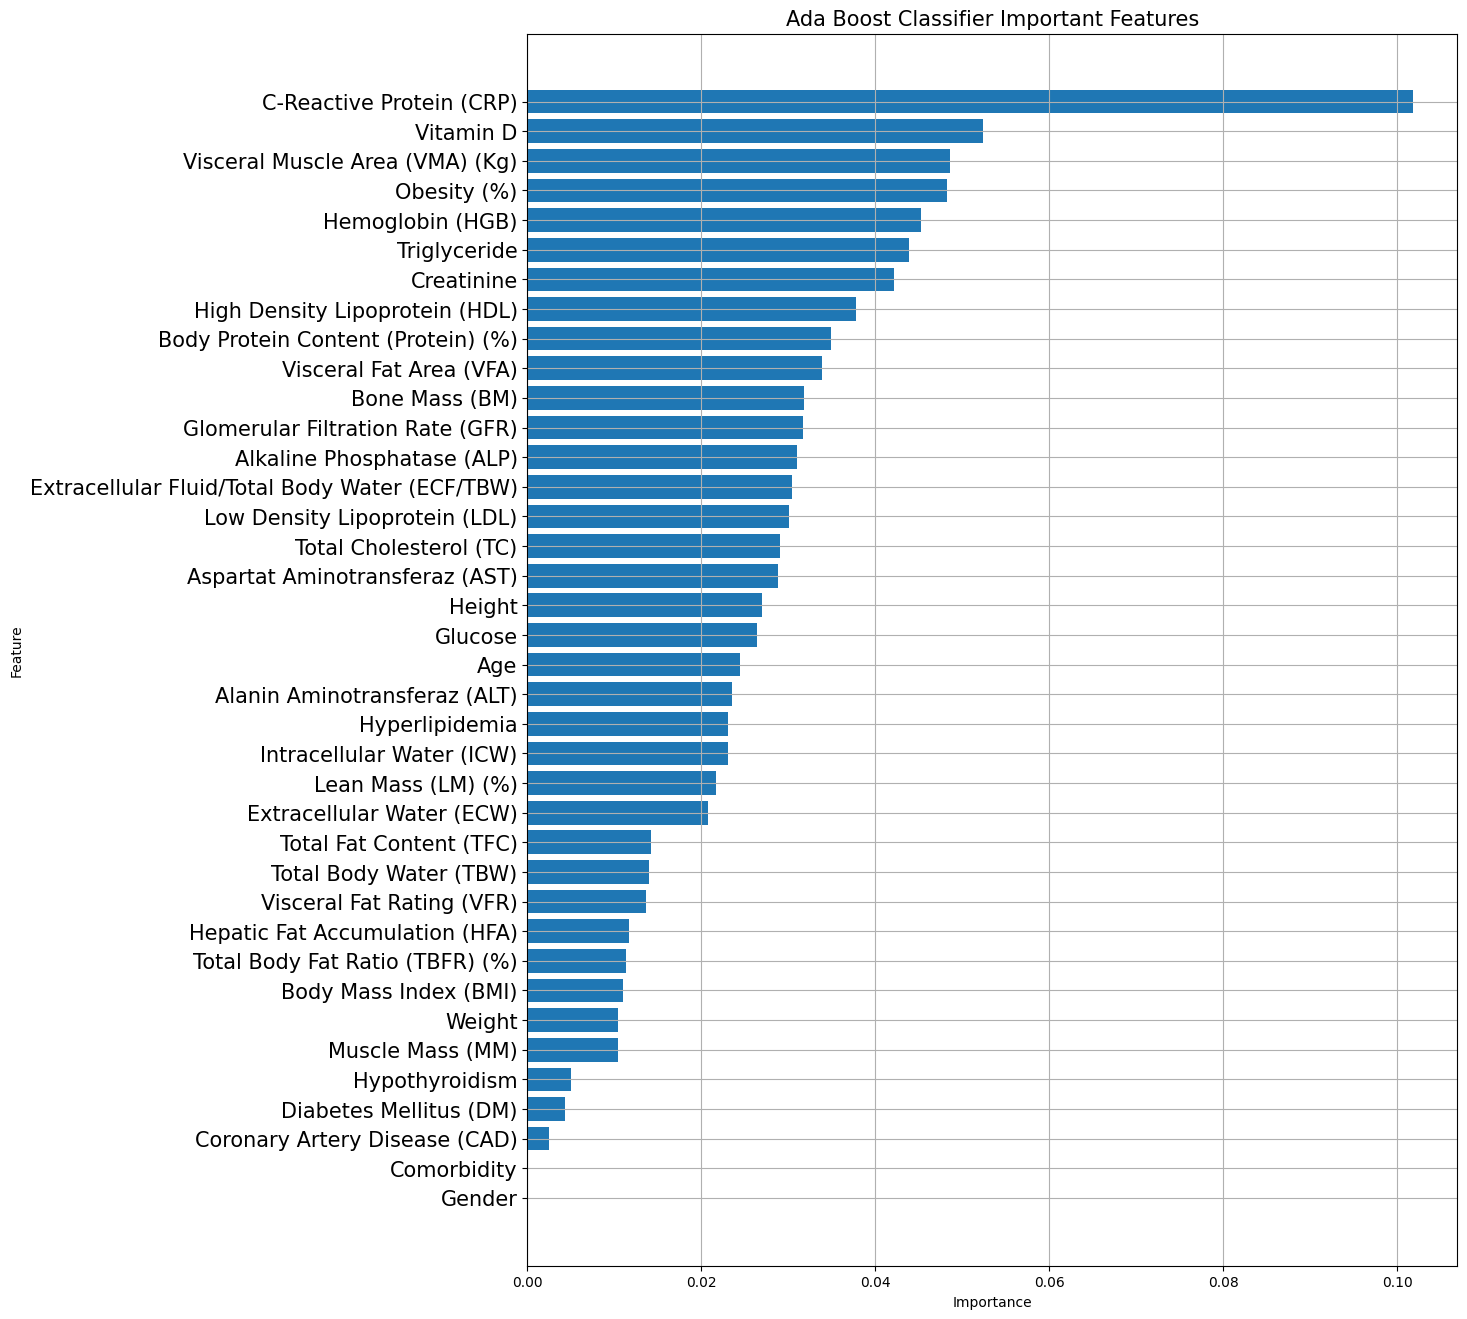

In [35]:
imp_features = ada.feature_importances_

f_names = X_columns
sorted_imp = imp_features.argsort()[::-1]

plt.figure(figsize=(12,16))
plt.grid(True)
bars = plt.barh(range(len(imp_features)), imp_features[sorted_imp][::-1])
plt.yticks( range(len(imp_features)), [f_names[i] for i in sorted_imp][::-1], fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Ada Boost Classifier Important Features', fontsize=15)
plt.show()

Like Random Forest, here too C-Reactive Protein and Vitamin D are important features but here the third important feature is Visceral Muscle Area.

## Gradient Boosting Classifier:

In [36]:
gbc = GradientBoostingClassifier(random_state=42)
param_gbc = {'learning_rate':[0.1,1,10],
            'max_features':[2,3],
            'subsample':[0.1,0.5],
            'n_estimators':[50,100,200]}
grid = GridSearchCV(gbc, param_grid=param_gbc, cv=cv, scoring='accuracy')
grid.fit(X_train, Y_train)
model_eval(grid)

Best Parameters:  {'learning_rate': 0.1, 'max_features': 3, 'n_estimators': 200, 'subsample': 0.1}
Best Score:  0.7450980392156863


In [37]:
gbc = GradientBoostingClassifier(learning_rate=0.1, max_features=3, subsample=0.5, n_estimators=200, random_state=42)
gbc.fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)
scores(Y_test, gbc_pred, 'Gradient Boosting Classifier')

Model:  Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.90      0.81      0.85        32

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64

Accuracy score:  0.859375
Roc Auc score:  0.859375


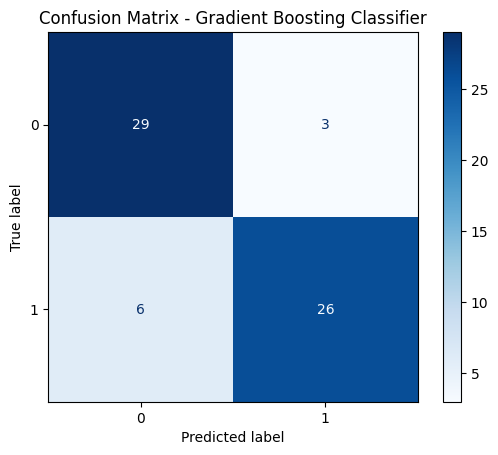

In [38]:
disp_mat(Y_test, gbc_pred, 'Gradient Boosting Classifier')

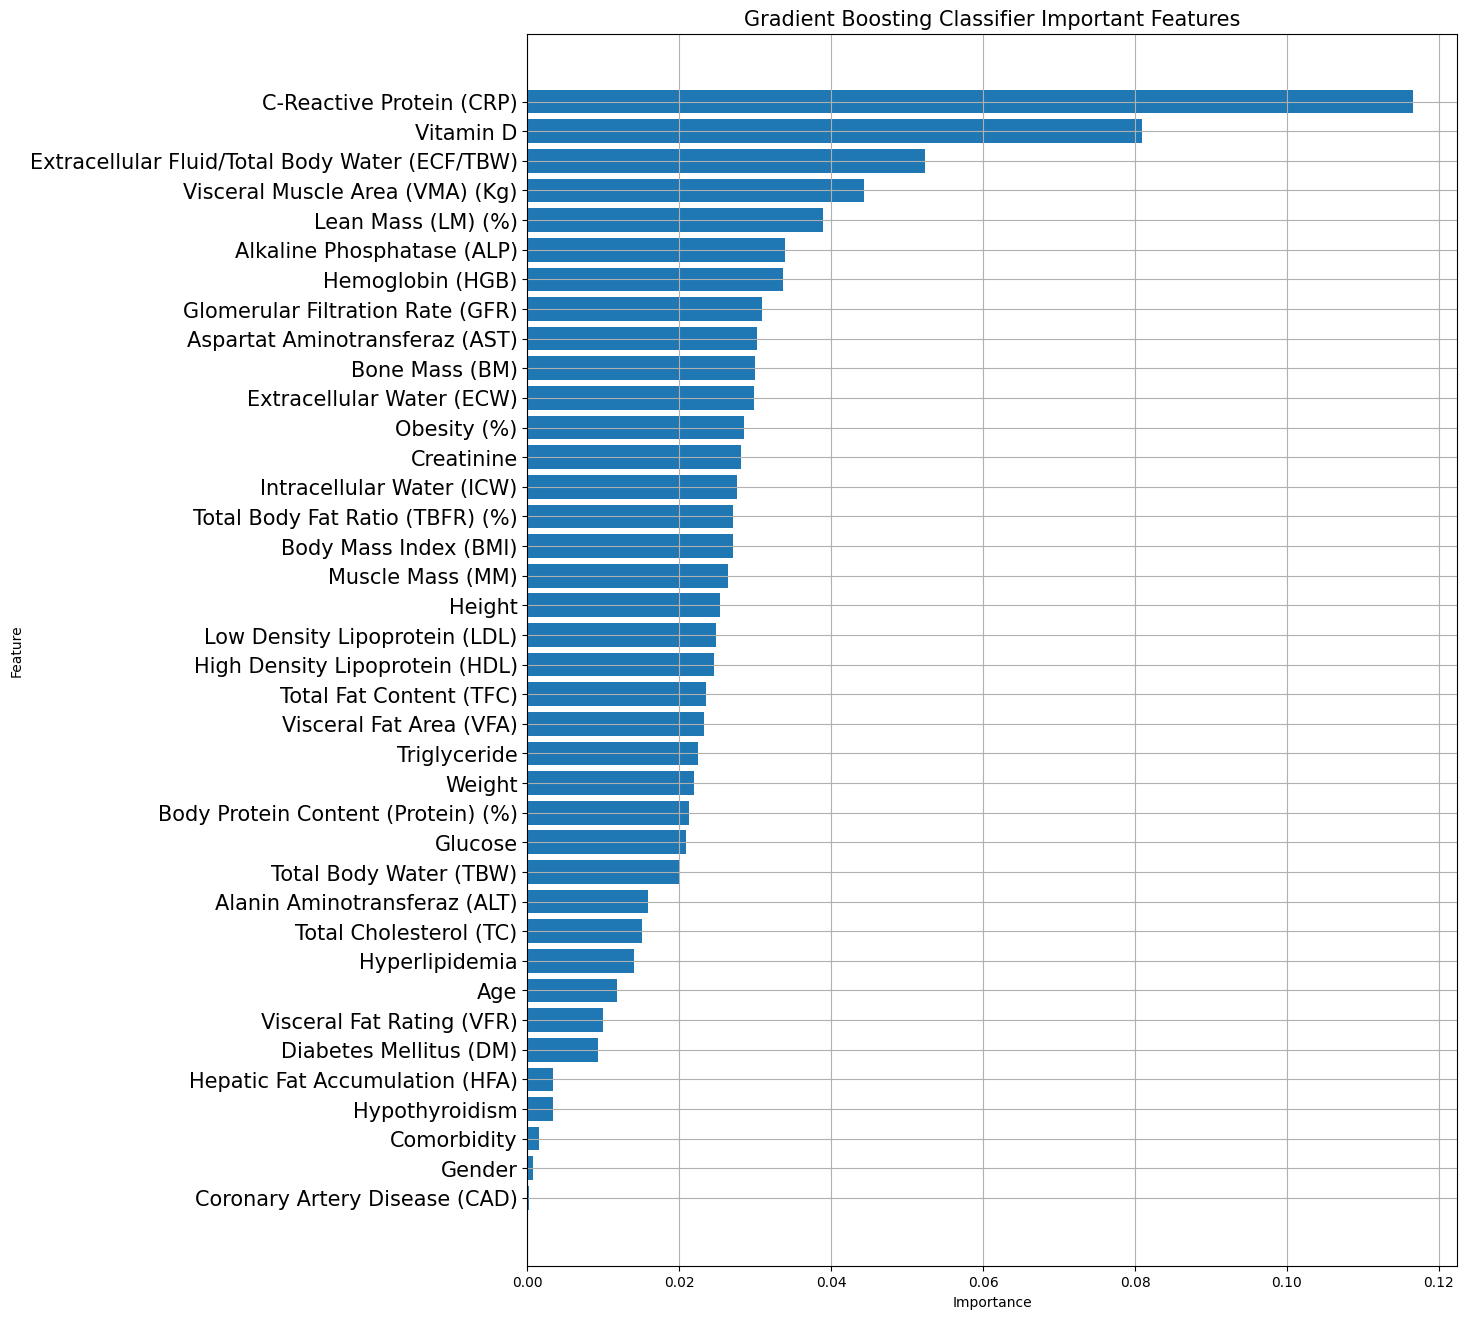

In [39]:
imp_features = gbc.feature_importances_

f_names = X_columns
sorted_imp = imp_features.argsort()[::-1]

plt.figure(figsize=(12,16))
plt.grid(True)
bars = plt.barh(range(len(imp_features)), imp_features[sorted_imp][::-1])
plt.yticks( range(len(imp_features)), [f_names[i] for i in sorted_imp][::-1], fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Classifier Important Features', fontsize=15)
plt.show()

Again C-Reactive Protein, Vitamin D has high importances in the feature ranking.

Like Random Forest here too Extracellular Fluid/Total Body Water comes as third important feature in classifying the target variable.

## Model Evaluation:

| Model | Description | Should be |
|-------|-------------|-----------|
| Accuracy Score | Measures the proportion of correctly classified instances | Closer to 1|
| Roc Auc Score | Measures the area under the ROC curve; represents the model's ability to distinguish between classes | Closer to 1|
| F1 Score | Harmonic mean of precision and recall; balances both false positives and false negatives | Closer to 1| 
| Precision | Measures the proportion of true positive predictions among all positive prediction | Closer to 1 |

#### Let us compare our models:

In [40]:
col_names = ['Model', 'Accuracy', 'Roc Auc Score', 'F1 Score', 'Precision Score']
perf_df = pd.DataFrame([model_m, acc_m, roc_m, f1_m, prec_m])
perf_df = perf_df.T
perf_df.columns = col_names
perf_df

,Model,Accuracy,Roc Auc Score,F1 Score,Precision Score
0,OnevsOne Classifier,0.78125,0.78125,0.766667,0.821429
1,SVC,0.78125,0.78125,0.787879,0.764706
2,KNeighbors Classifier,0.703125,0.703125,0.666667,0.76
3,Random Forest Classifier,0.8125,0.8125,0.806452,0.833333
4,AdaBoost Classifier,0.828125,0.828125,0.819672,0.862069
5,Gradient Boosting Classifier,0.859375,0.859375,0.852459,0.896552


Gradient Boosting has done better in all of the metrics, with AdaBoost Classifer and Random Forest getting good scores in all the metrics.

### Final Model & Pipeline:

We choose Gradient Boosting as our final model for building our pipeline.

In [41]:
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), num_features),
    ('pass', 'passthrough', cat_features)
])

pipeline = Pipeline([
    #('preprocess', preprocessor), since we already scaled the data
    ('model', GradientBoostingClassifier(
        learning_rate=0.1, max_features=3, subsample=0.5,
        n_estimators=200, random_state=42))
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

scores(Y_test, y_pred, 'Final Model')

Model:  Final Model
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.90      0.81      0.85        32

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64

Accuracy score:  0.859375
Roc Auc score:  0.859375


**The pipeline has done every step of our process so far, and prevented any data leakage.**

We can save our pipeline so we can redeploy it afterwards.

In [42]:
joblib.dump(pipeline, "gallstone_pipeline.pkl")

['gallstone_pipeline.pkl']

## Conclusion:

In conclusion, while the basic models gave mediocre performances, it can be improved with some hyper-parameter tuning.

While our ensemble models have done a stellar job, given our small dataset.

**Important features in Gradient Boosting Classifier**
- C-Reactive Protein
- Vitamin D
- Extracellular Fluid/Total Body Water
- Visceral Muscle Area
- Lean Mass

**Important Features in Random Forest Classifier:**
- C-Reactive Protein
- Vitamin D
- Visceral Muscle Area
- Obesity
- Hemoglobin

### Future Improvements:

We did managed to build a good model with 85% accuracy, still if we can get some more observations it can improve our model's classifiying ability.

### Reference : 
[Early prediction of gallstone disease with a machine learning-based method from bioimpedance and laboratory data](https://www.semanticscholar.org/paper/43be985fd49985ad442bf4259bf7769725689afc)
By Irfan Esen, Hilal Arslan, Selin Aktürk Esen, Mervenur Gülşen, Nimet Kültekin, Oğuzhan Özdemir. 2024

Published in Medicine.